In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# === 1. Load Data ===
metadata = pd.read_csv(r"metadata.csv", sep=";")

In [2]:
seqtab = pd.read_excel(r"seqtab_nochim_export.xlsx")


##########################################

In [76]:
seqtab_of_one_person=pd.read_csv(r"seqtab_nochim.csv", sep=",")
print("Number of columns:", len(seqtab_of_one_person.columns))

# iterate over seqtab.columns[1:] and for each column name, access the corresponding row in taxa dataframe and set the column name to the genus field
for col in seqtab_of_one_person.columns[1:]:
    if col in taxa['Unnamed: 0'].values:
        genus = taxa.loc[taxa['Unnamed: 0'] == col, 'Genus'].iloc[0]
        if pd.isna(genus):
            genus = 'Unassigned'
        seqtab_of_one_person.rename(columns={col: genus}, inplace=True)

seqtab_of_one_person


Number of columns: 375


,Unnamed: 0,Coprococcus,CCTACGGGAGGCTGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTCGCGTGAAGGAAGACGGATCTATGGTTTGTAAACTTCTTTAGTGCGGGAACAAAGCGGCGTCGTGACGCCGGATGAGTGTACCGCAAGAATAAGCATCGGCTAACTCCGTGCCAGCAGCCGCGGTAATACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGCAGGCTGCGAGGCAAGTCAGCGGTCAAATGTCGGGGCTCAACCCCGGCCTGCCGTTGAAACTGTCCTGCTAGAGTTCGAGTGAGGTATGCGGAATGCGTTGTGTAGCGGTGAAATGCATAGATATGACGCAGAACTCCGATTGCGAAGGCAGCATACCAACTCGCGACTGACGCTGAGGCTCGAAAGCGTGGGTATCGAACAGGATTAGATACCCCGGTAGTC,Clostridium sensu stricto 1,Unassigned,Ruminococcus,Clostridium sensu stricto 1,Clostridium sensu stricto 1,Clostridium sensu stricto 1,Clostridium sensu stricto 1,...,CCTACGGGGGGCTGCAGTGATAAACCTTTAGCAATAAACCAAAGTTTAACTAAGCCATACTAACCCCAGGGTTGGTCAATTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAACCGGCATAAAGAGTGTTTTAGATCAATTCCCCTCAATAAAGCTAAAATTCACGTGAGTTGTAAAAAACTCCAGTTGATACAAAATAAACTACGAAAGTGGCTTTAATGCATCTGAACACAGAATAACTAAGACCCAAACTGGGATTAGATACCCCAGTAGTC,Unassigned,CCTACGGGGGGCTGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGAAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAAAACGTAGGTCACGAGCGTTGTCCGGAATTACTGGGTGTAAAGGGAGCGCAGGCGGGCGATCAAGTTGGAAGTGAAATCCATGGGCTCAACCCATGAACTGCTTTCAAAACTGATTGTCTTGAGTAGTGCAGAGGTAGGCGGAATTCCCGGTGTAGCGGTGGAATGCGTAGATATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCACCAACTGACGCTGAGGCTCGAAAGTGTGGGTAGCAAACAGGATTAGATACCCTTGTAGTC,Unassigned,Faecalibacterium,CCTACGGGGGGCTGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGAGCGAAGAAGTATTTCGGTATGTAAAGCTCTATCAGCAGGGAAGAAAATGACGGTACCTGACTAAGAAGCCCCGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGAGCAGCAAGTCTGATGTGAAAACCCGGGGCTCAACCCCGGGACTGCATTGGAAACTGTTGATCTGGAGTGCCGGAGAGGTAAGCGGAATTCCTAGTGTAGCGGTGAAATGCGTAGATATTAGGAGGAACACCAGTGGCGAAGGCGGCTTACTGGACGGTAACTGACGTTGAGGCTCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCCAGTAGTC,Parvimonas,CCTACGGGGGGCTGCAGTGGGGAATATTGGACAATGGGGGCAACCCTGATCCAGCAATTCTGTGTGCACGAAGAAGGTTTTCGGATTGTAAAGTGCTTTCAGCAGGGAAGAAGAAAGTGACGGTACCTGCAGAAGAAGCGACGGCTAAATACGTGCCAGCAGCCGCGGTAATACGTATGTCGCAAGCGTTATCCGGAATTATTGGGCATAAAGGGCATCTAGGCGGCCCTGTAAGTCTAGGGTGAAAACCTGCGGCTCAACCGCAGGCCTGCCCCGGAAACTACAGGGCTAGAGTATCGGAGAGGTGGACGGAACTGCACGAGTAGAGGTGAAATTCGTAGAGATCGGGAGGAACACCAGTGGCGAAGGCGGCCTACTGGGCTTTAACTGACGCTGAGGCACGAAAGTGTGGGTAGCAAACAGGATTAGATACCCTGGTAGTC,Unassigned,Faecalibacterium
0,1,115,94,89,88,86,85,85,83,82,...,5,5,5,5,5,5,4,2,2,2


In [3]:
# Contains 'Sample' and 'CRC'
taxa = pd.read_excel(r"taxa_species_export.xlsx")

In [4]:
# iterate over seqtab.columns[1:] and for each column name, access the corresponding row in taxa dataframe and set the column name to the genus field
for col in seqtab.columns[1:]:
    if col in taxa['Unnamed: 0'].values:
        genus = taxa.loc[taxa['Unnamed: 0'] == col, 'Genus'].iloc[0]
        if pd.isna(genus):
            genus = 'Unassigned'
        seqtab.rename(columns={col: genus}, inplace=True)
seqtab

,Unnamed: 0,Unassigned,[Ruminococcus] torques group,Unassigned,Clostridium sensu stricto 1,Roseburia,[Ruminococcus] torques group,[Ruminococcus] torques group,Unassigned,Unassigned,...,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Unassigned,Unassigned,Unassigned,Unassigned
0,CRC1,34,0,20,0,76,0,0,19,24,...,0,0,0,0,0,0,0,0,0,0
1,CRC10,58,25,0,0,0,11,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CRC11,176,48,153,0,40,0,0,139,173,...,0,0,0,0,0,0,0,0,0,0
3,CRC12,0,113,73,0,49,71,103,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CRC13,0,0,34,0,69,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,CRC14,20,0,31,0,33,0,0,23,13,...,0,0,0,0,0,0,0,0,0,0
6,CRC15,0,261,0,0,56,240,267,0,0,...,0,0,0,0,0,0,0,0,0,0
7,CRC16,53,91,0,90,16,87,74,0,0,...,0,0,0,0,0,0,0,0,0,0
8,CRC17,0,0,0,0,21,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,CRC18,0,11,0,0,0,14,15,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# rename column "Unnamed: 0" to "host_disease"
seqtab.rename(columns={"Unnamed: 0": "host_disease"}, inplace=True)
seqtab.head()


,host_disease,Unassigned,[Ruminococcus] torques group,Unassigned,Clostridium sensu stricto 1,Roseburia,[Ruminococcus] torques group,[Ruminococcus] torques group,Unassigned,Unassigned,...,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Unassigned,Unassigned,Unassigned,Unassigned
0,CRC1,34,0,20,0,76,0,0,19,24,...,0,0,0,0,0,0,0,0,0,0
1,CRC10,58,25,0,0,0,11,15,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CRC11,176,48,153,0,40,0,0,139,173,...,0,0,0,0,0,0,0,0,0,0
3,CRC12,0,113,73,0,49,71,103,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CRC13,0,0,34,0,69,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
seqtab_host_disease = set(seqtab['host_disease'])
metadata_host_disease = set(metadata['host_disease'])

print(len(seqtab_host_disease))
print(len(metadata_host_disease))
print(len(seqtab_host_disease.intersection(metadata_host_disease)))

59
59
59


In [15]:
print('Unique host_disease values in metadata:', sorted(metadata['host_disease'].unique()))

Unique host_disease values in metadata: ['CRC1', 'CRC10', 'CRC11', 'CRC12', 'CRC13', 'CRC14', 'CRC15', 'CRC16', 'CRC17', 'CRC18', 'CRC19', 'CRC2', 'CRC20', 'CRC21', 'CRC3', 'CRC4', 'CRC5', 'CRC6', 'CRC7', 'CRC8', 'CRC9', 'Healthy1', 'Healthy10', 'Healthy11', 'Healthy12', 'Healthy13', 'Healthy14', 'Healthy15', 'Healthy16', 'Healthy17', 'Healthy18', 'Healthy19', 'Healthy2', 'Healthy3', 'Healthy4', 'Healthy5', 'Healthy6', 'Healthy7', 'Healthy8', 'Healthy9', 'Polype1', 'Polype10', 'Polype11', 'Polype12', 'Polype13', 'Polype14', 'Polype15', 'Polype16', 'Polype17', 'Polype18', 'Polype19', 'Polype2', 'Polype3', 'Polype4', 'Polype5', 'Polype6', 'Polype7', 'Polype8', 'Polype9']


In [16]:
print(len(seqtab_host_disease.difference(metadata_host_disease)))

0


In [17]:
# find which element in seqtab_host_disease is not in metadata_host_disease
seqtab_host_disease.difference(metadata_host_disease)




set()

In [18]:

# Create mapping dictionary from host_disease to SampleID
host_disease_to_sampleid = metadata.set_index('host_disease')['SampleID'].to_dict()

# Create copy of seqtab for genus-level analysis
seqtab_genus = seqtab.copy()

# Map host_disease to SampleID in the index
seqtab_genus['host_disease'] = seqtab_genus['host_disease'].map(host_disease_to_sampleid)

# Rename host_disease column to SampleID
seqtab_genus.rename(columns={'host_disease': 'SampleID'}, inplace=True)

# Set SampleID as index
seqtab_genus.set_index('SampleID', inplace=True)



In [19]:
seqtab_genus.head()

,Unassigned,[Ruminococcus] torques group,Unassigned,Clostridium sensu stricto 1,Roseburia,[Ruminococcus] torques group,[Ruminococcus] torques group,Unassigned,Unassigned,Unassigned,...,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Unassigned,Unassigned,Unassigned,Unassigned
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR29923448,34,0,20,0,76,0,0,19,24,21,...,0,0,0,0,0,0,0,0,0,0
SRR29923474,58,25,0,0,0,11,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR29923475,176,48,153,0,40,0,0,139,173,101,...,0,0,0,0,0,0,0,0,0,0
SRR29923488,0,113,73,0,49,71,103,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR29923489,0,0,34,0,69,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Create a mapping dictionary from SampleID to DiseaseStatus
disease_status_map = metadata.set_index('SampleID')['DiseaseStatus'].map(lambda x: 1 if x == "Colorectal cancer" else 0).to_dict()

# Add DiseaseStatus column by mapping from SampleID index
seqtab_genus['DiseaseStatus'] = seqtab_genus.index.map(disease_status_map)

# Check class balance
class_counts = seqtab_genus['DiseaseStatus'].value_counts()
print("\nClass distribution:")
print(class_counts)
print("\nClass proportions:")
print(class_counts / len(seqtab_genus))





Class distribution:
DiseaseStatus
0    38
1    21
Name: count, dtype: int64

Class proportions:
DiseaseStatus
0    0.644068
1    0.355932
Name: count, dtype: float64


,Unassigned,[Ruminococcus] torques group,Unassigned,Clostridium sensu stricto 1,Roseburia,[Ruminococcus] torques group,[Ruminococcus] torques group,Unassigned,Unassigned,Unassigned,...,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Prevotella_9,Unassigned,Unassigned,Unassigned,Unassigned,DiseaseStatus
SampleID,,,,,,,,,,,,,,,,,,,,,
SRR29923448,0.000387,0.000000,0.000289,0.000000,0.000908,0.000000,0.000000,0.000292,0.000371,0.000289,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
SRR29923474,0.001655,0.000583,0.000000,0.000000,0.000000,0.000291,0.000437,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
SRR29923475,0.001347,0.000300,0.001488,0.000000,0.000321,0.000000,0.000000,0.001435,0.001800,0.000933,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
SRR29923488,0.000000,0.000838,0.000842,0.000000,0.000467,0.000598,0.000956,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
SRR29923489,0.000000,0.000000,0.000500,0.000000,0.000839,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
SRR29923490,0.000221,0.000000,0.000435,0.000000,0.000383,0.000000,0.000000,0.000343,0.000195,0.000293,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
SRR29923491,0.000000,0.002745,0.000000,0.000000,0.000757,0.002868,0.003514,0.000000,0.000000,0.000093,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
SRR29923492,0.000465,0.000652,0.000000,0.000444,0.000147,0.000708,0.000663,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
SRR29923493,0.000000,0.000000,0.000000,0.000000,0.000256,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Print original shape
print("Original seqtab_genus shape:", seqtab_genus.shape)

# Instead of boolean indexing, use drop to remove DiseaseStatus
data_to_normalize = seqtab_genus.drop('DiseaseStatus', axis=1)
print("Shape after dropping DiseaseStatus:", data_to_normalize.shape)

# Now proceed with scaling if the shape looks correct
normalized_data = scaler.fit_transform(data_to_normalize)
print("Shape after normalization:", normalized_data.shape)

# Convert back to DataFrame
normalized_df = pd.DataFrame(normalized_data, 
                           columns=data_to_normalize.columns,
                           index=seqtab_genus.index)

# Calculate row sums for scaling to sum to 1
row_sums = normalized_df.sum(axis=1)

# Scale rows to sum to 1
normalized_df = normalized_df.div(row_sums, axis=0)

# Add back DiseaseStatus column
normalized_df['DiseaseStatus'] = seqtab_genus['DiseaseStatus']

# Update original DataFrame
seqtab_genus = normalized_df

Original seqtab_genus shape: (59, 6694)
Shape after dropping DiseaseStatus: (59, 6693)
Shape after normalization: (59, 6693)


In [23]:
# Calculate the sum of all rows (excluding DiseaseStatus)
row_sums = seqtab_genus.drop('DiseaseStatus', axis=1).sum(axis=1)
print("Row sums:")
print(row_sums)


Row sums:
SampleID
SRR29923448    1.0
SRR29923474    1.0
SRR29923475    1.0
SRR29923488    1.0
SRR29923489    1.0
SRR29923490    1.0
SRR29923491    1.0
SRR29923492    1.0
SRR29923493    1.0
SRR29923494    1.0
SRR29923495    1.0
SRR29923449    1.0
SRR29923496    1.0
SRR29923487    1.0
SRR29923467    1.0
SRR29923468    1.0
SRR29923469    1.0
SRR29923470    1.0
SRR29923471    1.0
SRR29923472    1.0
SRR29923473    1.0
SRR29923450    1.0
SRR29923497    1.0
SRR29923498    1.0
SRR29923499    1.0
SRR29923500    1.0
SRR29923501    1.0
SRR29923502    1.0
SRR29923503    1.0
SRR29923504    1.0
SRR29923505    1.0
SRR29923506    1.0
SRR29923452    1.0
SRR29923453    1.0
SRR29923454    1.0
SRR29923455    1.0
SRR29923457    1.0
SRR29923466    1.0
SRR29923476    1.0
SRR29923486    1.0
SRR29923451    1.0
SRR29923465    1.0
SRR29923477    1.0
SRR29923478    1.0
SRR29923479    1.0
SRR29923480    1.0
SRR29923481    1.0
SRR29923482    1.0
SRR29923483    1.0
SRR29923484    1.0
SRR29923485    1.0
SRR29923456 

In [24]:
# Prepare features (X) and labels (y)
X = seqtab_genus.drop(['DiseaseStatus'], axis=1)  # Remove DiseaseStatus column for features
y = seqtab_genus['DiseaseStatus']  # Extract DiseaseStatus as labels

print("Features shape (X):", X.shape)
print("Labels shape (y):", y.shape)
# Check if SampleID is included in the features
print("\nColumns in X:")
print(X.columns)


Features shape (X): (59, 6693)
Labels shape (y): (59,)

Columns in X:
Index(['Unassigned', '[Ruminococcus] torques group', 'Unassigned',
       'Clostridium sensu stricto 1', 'Roseburia',
       '[Ruminococcus] torques group', '[Ruminococcus] torques group',
       'Unassigned', 'Unassigned', 'Unassigned',
       ...
       'Prevotella_9', 'Prevotella_9', 'Prevotella_9', 'Prevotella_9',
       'Prevotella_9', 'Prevotella_9', 'Unassigned', 'Unassigned',
       'Unassigned', 'Unassigned'],
      dtype='object', length=6693)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
  # === 1. Random Forest  ===
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
# === 9. Evaluate the Model ===
y_pred = model.predict(X_test)
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# 2. SVC
# Try Support Vector Machine (SVM) classifier
from sklearn.svm import SVC

# Initialize and train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Print evaluation metrics
print("\n🤖 SVM Model Results:")
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))



🤖 SVM Model Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       0.00      0.00      0.00         5

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12

Accuracy: 0.5833333333333334


c:\Users\arame\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arame\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arame\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [69]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc_clf = make_pipeline(
    StandardScaler(),
    SVC(C=1.0, kernel='linear')  # Try RBF later too
)

svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("\n🧠 SVM Accuracy:")
print("Accuracy:", accuracy_svc)



🧠 SVM Accuracy:
Accuracy: 0.6666666666666666


In [ ]:
# neural networks
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Define and train the neural network with modified hyperparameters
nn_model = MLPRegressor(
    hidden_layer_sizes=(1024, 512, 256, 128, 64), # Modified layer sizes
    activation='tanh', # Changed activation function
    solver='adam',
    learning_rate='adaptive', # Added adaptive learning rate
    max_iter=2000, # Increased max iterations further
    random_state=42,
    verbose=True,
    early_stopping=True, # Enable early stopping
    validation_fraction=0.2, # Added validation split
    n_iter_no_change=20, # Reduced patience
    alpha=0.001, # Added L2 regularization
    batch_size=32 # Added mini-batch size
)

# Train the model
nn_model.fit(X_train, y_train)

# Predict on test data
y_pred = nn_model.predict(X_test)

# Round predictions to nearest integer since we're doing classification
y_pred_rounded = np.round(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rounded)

print("\n📈 Neural Network Results (sklearn):")
print("Accuracy:", accuracy)


Iteration 1, loss = 0.38123196
Validation score: -0.969438
Iteration 2, loss = 0.25067516
Validation score: -1.584656
Iteration 3, loss = 0.36632814
Validation score: -0.399857
Iteration 4, loss = 0.21022212
Validation score: -0.192531
Iteration 5, loss = 0.18370242
Validation score: -0.875610
Iteration 6, loss = 0.22324499
Validation score: -0.375225
Iteration 7, loss = 0.17121886
Validation score: 0.012384
Iteration 8, loss = 0.13871395
Validation score: 0.019264
Iteration 9, loss = 0.14313734
Validation score: -0.060833
Iteration 10, loss = 0.14874581
Validation score: -0.030837
Iteration 11, loss = 0.13324252
Validation score: 0.078167
Iteration 12, loss = 0.10339565
Validation score: 0.074666
Iteration 13, loss = 0.08337697
Validation score: -0.090007
Iteration 14, loss = 0.07328120
Validation score: -0.154049
Iteration 15, loss = 0.06801843
Validation score: -0.017182
Iteration 16, loss = 0.06031543
Validation score: 0.129109
Iteration 17, loss = 0.06643437
Validation score: 0.15

In [30]:
# Try different hyperparameters for the neural network
nn_model_v2 = MLPRegressor(
    hidden_layer_sizes=(2048, 1024, 512, 256), # Larger network
    activation='relu', # Changed to ReLU activation
    solver='adam',
    learning_rate='constant', # Changed to constant learning rate
    learning_rate_init=0.001, # Explicit learning rate
    max_iter=3000, # More iterations
    random_state=42,
    verbose=True,
    early_stopping=True,
    validation_fraction=0.15, # Reduced validation split
    n_iter_no_change=25, # Increased patience
    alpha=0.0005, # Reduced regularization
    batch_size=64 # Larger batch size
)

# Train the model
nn_model_v2.fit(X_train, y_train)

# Predict and evaluate
y_pred_v2 = nn_model_v2.predict(X_test)
y_pred_v2_rounded = np.round(y_pred_v2)
accuracy_v2 = accuracy_score(y_test, y_pred_v2_rounded)

print("\n📈 Neural Network Results (sklearn) - Version 2:")
print("Accuracy:", accuracy_v2)


c:\Users\arame\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Iteration 1, loss = 0.20545973
Validation score: -0.602597
Iteration 2, loss = 0.15187687
Validation score: -1.621613
Iteration 3, loss = 0.16180795
Validation score: -1.223189
Iteration 4, loss = 0.15128577
Validation score: -0.678788
Iteration 5, loss = 0.14392249
Validation score: -0.393032
Iteration 6, loss = 0.14281175
Validation score: -0.345185
Iteration 7, loss = 0.13977385
Validation score: -0.453851
Iteration 8, loss = 0.13294864
Validation score: -0.683399
Iteration 9, loss = 0.12540706
Validation score: -0.947547
Iteration 10, loss = 0.11825780
Validation score: -1.062825
Iteration 11, loss = 0.10821917
Validation score: -0.938891
Iteration 12, loss = 0.09347390
Validation score: -0.679534
Iteration 13, loss = 0.07637360
Validation score: -0.460249
Iteration 14, loss = 0.05795054
Validation score: -0.370971
Iteration 15, loss = 0.03902763
Validation score: -0.402639
Iteration 16, loss = 0.02652658
Validation score: -0.304058
Iteration 17, loss = 0.02529834
Validation score:

In [42]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
import numpy as np

# Try different hyperparameters
nn_model_v3 = MLPRegressor(
    hidden_layer_sizes=(512, 256, 128),  # Smaller network to reduce overfitting
    activation='tanh',  # Try 'tanh' instead of 'relu'
    solver='adam',
    learning_rate='adaptive',  # Adaptive learning rate
    learning_rate_init=0.0005,  # Lower initial learning rate
    max_iter=2000,  # Fewer iterations
    random_state=42,
    verbose=True,
    early_stopping=True,
    validation_fraction=0.2,  # Slightly higher validation split
    n_iter_no_change=15,  # Reduced patience
    alpha=0.001,  # Slightly more regularization
    batch_size=2  # Smaller batch size
)

# Train the model
nn_model_v3.fit(X_train, y_train)

# Predict and evaluate
y_pred_v3 = nn_model_v3.predict(X_test)
y_pred_v3_rounded = np.round(y_pred_v3)
accuracy_v3 = accuracy_score(y_test, y_pred_v3_rounded)

print("\n📈 Neural Network Results (sklearn) - Version 3:")
print("Accuracy:", accuracy_v3)


Iteration 1, loss = 0.43058468
Validation score: -0.220833
Iteration 2, loss = 0.32698182
Validation score: 0.058069
Iteration 3, loss = 0.24314192
Validation score: 0.089714
Iteration 4, loss = 0.19458898
Validation score: 0.240453
Iteration 5, loss = 0.14948724
Validation score: 0.246553
Iteration 6, loss = 0.13361843
Validation score: 0.253376
Iteration 7, loss = 0.12226737
Validation score: 0.247837
Iteration 8, loss = 0.11432700
Validation score: 0.296458
Iteration 9, loss = 0.10684141
Validation score: 0.234294
Iteration 10, loss = 0.10289678
Validation score: 0.286058
Iteration 11, loss = 0.09913946
Validation score: 0.265209
Iteration 12, loss = 0.09536284
Validation score: 0.218372
Iteration 13, loss = 0.09320050
Validation score: 0.099066
Iteration 14, loss = 0.09435215
Validation score: 0.208087
Iteration 15, loss = 0.09018053
Validation score: 0.205253
Iteration 16, loss = 0.08223584
Validation score: 0.272355
Iteration 17, loss = 0.07961122
Validation score: 0.277945
Itera

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the classifier with optimized hyperparameters
clf = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),
    activation='relu',
    solver='adam',
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=3000,
    random_state=42,
    verbose=True,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20,
    alpha=0.0001,
    batch_size=32
)

# Train the classifier
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_clf = clf.predict(X_test)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

print("\n🔥 Improved Neural Network Results (sklearn - Classifier):")
print("Accuracy:", accuracy_clf)


Iteration 1, loss = 0.73429699
Validation score: 0.500000
Iteration 2, loss = 0.69184943
Validation score: 0.700000
Iteration 3, loss = 0.66691651
Validation score: 0.700000
Iteration 4, loss = 0.64819859
Validation score: 0.700000
Iteration 5, loss = 0.63442181
Validation score: 0.700000
Iteration 6, loss = 0.62028850
Validation score: 0.700000
Iteration 7, loss = 0.60814630
Validation score: 0.700000
Iteration 8, loss = 0.59548304
Validation score: 0.700000
Iteration 9, loss = 0.58480882
Validation score: 0.700000
Iteration 10, loss = 0.56968441
Validation score: 0.700000
Iteration 11, loss = 0.55090933
Validation score: 0.700000
Iteration 12, loss = 0.52706946
Validation score: 0.700000
Iteration 13, loss = 0.49175524
Validation score: 0.700000
Iteration 14, loss = 0.44923509
Validation score: 0.700000
Iteration 15, loss = 0.40329478
Validation score: 0.700000
Iteration 16, loss = 0.36293148
Validation score: 0.700000
Iteration 17, loss = 0.32351877
Validation score: 0.700000
Iterat

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

logreg_clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=1.0, penalty='l1', solver='liblinear', random_state=10)
)

logreg_clf.fit(X_train, y_train)
y_pred_logreg = logreg_clf.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print("\n📉 Logistic Regression Accuracy:")
print("Accuracy:", accuracy_logreg)



📉 Logistic Regression Accuracy:
Accuracy: 0.8333333333333334


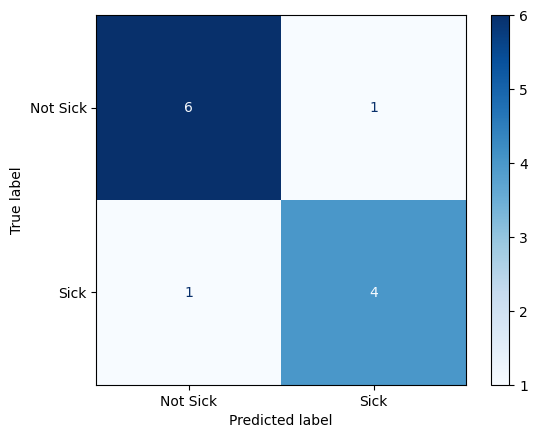

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Sick", "Sick"])

# Show it
disp.plot(cmap='Blues')


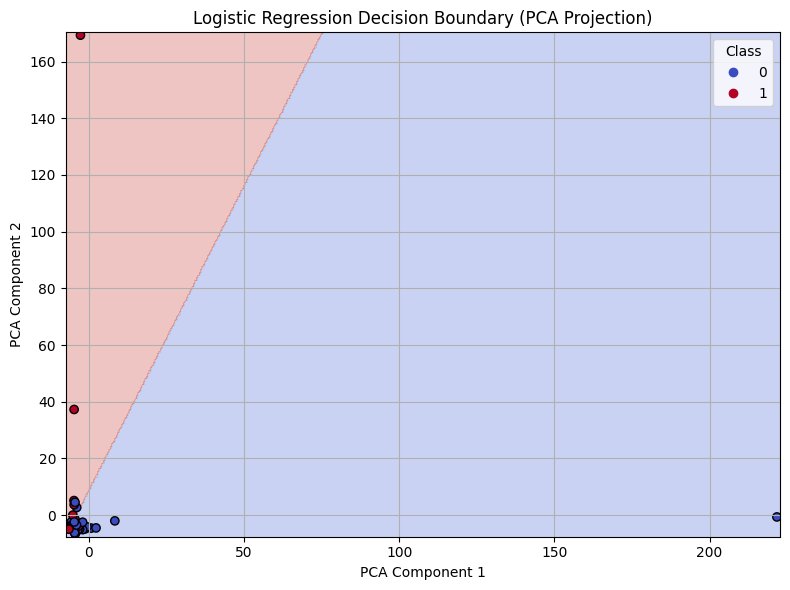

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Extract features and labels
X_train_scaled = logreg_clf.named_steps['standardscaler'].transform(X_train)
X_test_scaled = logreg_clf.named_steps['standardscaler'].transform(X_test)
X_total = np.vstack((X_train_scaled, X_test_scaled))
y_total = np.hstack((y_train, y_test))

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_total)

# Fit new logistic regression on reduced data for visualization
from sklearn.linear_model import LogisticRegression
vis_model = LogisticRegression()
vis_model.fit(X_2d[:len(X_train)], y_train)

# Create mesh grid for decision surface
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = vis_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_total, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("Logistic Regression Decision Boundary (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Class")
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2']
}

# Run GridSearch with Stratified 5-Fold CV
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Use the best model on test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print("\n🔎 Best Logistic Regression Model:")
print("Best Params:", grid.best_params_)
print("Test Accuracy:", accuracy_best)



🔎 Best Logistic Regression Model:
Best Params: {'logreg__C': 100, 'logreg__penalty': 'l1'}
Test Accuracy: 0.6666666666666666


In [70]:

# Install XGBoost if not already installed
import sys
import subprocess

def install_xgboost():
    try:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'xgboost'])
        print("XGBoost installed successfully!")
    except:
        print("Error installing XGBoost. Please try installing manually with: pip install xgboost")

try:
    import xgboost
except ImportError:
    print("XGBoost not found. Installing...")
    install_xgboost()


In [40]:

# === XGBoost Model ===


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
# === Split Data into Training and Test Sets ===
from sklearn.model_selection import train_test_split

# Prepare data for modeling
# Drop the DiseaseStatus column to create feature matrix X
X = normalized_df.drop('DiseaseStatus', axis=1)
# Create target variable y from DiseaseStatus column
y = normalized_df['DiseaseStatus']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train the model


xgb_model.fit(X_train.values, y_train.values)
xgb_predictions = xgb_model.predict(X_test.values)


# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print("\n📈 XGBoost Model Results:")
print("Accuracy:", xgb_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, xgb_predictions))



📈 XGBoost Model Results:
Accuracy: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12



In [68]:
import pandas as pd
import numpy as np

# Get the model coefficients
coefficients = logreg_clf.named_steps['logisticregression'].coef_[0]

# Create a pandas Series to view coefficients and their corresponding feature names
importances = pd.Series(np.abs(coefficients), index=X.columns)

# Sort coefficients by absolute value and get top 10
top_features = importances.sort_values(ascending=False).head(10)

# Print the top 10 most important features
print("\n🌟 Top 10 Predictive Features (by absolute coefficient value):")
print(top_features)



🌟 Top 10 Predictive Features (by absolute coefficient value):
Subdoligranulum                  1.105057
UCG-002                          0.589160
Lachnospiraceae NK4A136 group    0.523458
Fusobacterium                    0.517668
Faecalibacterium                 0.516595
Unassigned                       0.448240
Blautia                          0.441758
Roseburia                        0.434770
Subdoligranulum                  0.301451
Parvimonas                       0.249800
dtype: float64
